<a href="https://colab.research.google.com/github/peartt/cse480-notebooks/blob/master/07_1_Assorted_Topics_from_Chapters_11__and_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assorted Topics from Chapters 11 and 12
## Ponder and Prove
### Due: Saturday, 20 February 2021, 11:59 pm

## The goal is for you to make some good connections between these formal objects:
 
* Parse trees
* Derivation Sequences
* Instantaneous Description Sequences
 
See the example in Figure 11.1, with the derivation sequence shown on the right of this figure, and the ID sequence also shown below.

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty',
                   '../Jove',      '../Jove/jove']

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import * 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 11.21 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)



## Dyck CFG and Direct-Converted PDA

 Note that the CFG is inside the PDA code as a comment.

Generating LALR tables


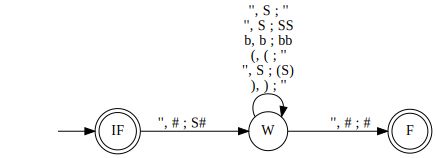

In [2]:
dyck = md2mc('''
PDA
!!-- CFG follows
!!-- S -> SS | (S) | ''

IF : '',#; S# -> W

W  : (,(; '' -> W
W  : ),); '' -> W

W  : b,b; bb -> W

W  : '',S; SS  -> W
W  : '',S; (S) -> W
W  : '',S; ''  -> W

W  : '',#; # -> F

''')
dotObj_pda(dyck, FuseEdges=True)

### TODO: Convert and compare Jove with the Automaton Simulator

This is the one demonstrated in class last week:

https://automatonsimulator.com/

Include a link encoding your saved machine.
https://automatonsimulator.com/#%7B%22type%22%3A%22PDA%22%2C%22pda%22%3A%7B%22transitions%22%3A%7B%22start%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%7D%2C%22s0%22%3A%7B%22(%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22(%22%7D%5D%7D%2C%22)%22%3A%7B%22(%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22%22%3A%7B%22%23%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%7D%7D%2C%22startState%22%3A%22start%22%2C%22acceptStates%22%3A%5B%22s1%22%5D%7D%2C%22states%22%3A%7B%22start%22%3A%7B%7D%2C%22s0%22%3A%7B%22top%22%3A328%2C%22left%22%3A246%2C%22displayId%22%3A%22s0%22%7D%2C%22s1%22%3A%7B%22isAccept%22%3Atrue%2C%22top%22%3A331%2C%22left%22%3A411%2C%22displayId%22%3A%22s1%22%7D%7D%2C%22transitions%22%3A%5B%7B%22stateA%22%3A%22start%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%23%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22(%2C%CF%B5%2C(%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22)%2C(%2C%CF%B5%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22%CF%B5%2C%23%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%5D%2C%22bulkTests%22%3A%7B%22accept%22%3A%22((())())()%5Cn%5Cn()%22%2C%22reject%22%3A%22(%5Cn())%22%7D%7D

In [3]:
explore_pda('((())())()', dyck)

String ((())())() accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', '((())())()', '#')
->  ('W', '((())())()', 'S#')
->  ('W', '((())())()', 'SS#')
->  ('W', '((())())()', '(S)S#')
->  ('W', '(())())()', 'S)S#')
->  ('W', '(())())()', 'SS)S#')
->  ('W', '(())())()', '(S)S)S#')
->  ('W', '())())()', 'S)S)S#')
->  ('W', '())())()', '(S))S)S#')
->  ('W', '))())()', 'S))S)S#')
->  ('W', '))())()', '))S)S#')
->  ('W', ')())()', ')S)S#')
->  ('W', '())()', 'S)S#')
->  ('W', '())()', '(S))S#')
->  ('W', '))()', 'S))S#')
->  ('W', '))()', '))S#')
->  ('W', ')()', ')S#')
->  ('W', '()', 'S#')
->  ('W', '()', '(S)#')
->  ('W', ')', 'S)#')
->  ('W', ')', ')#')
->  ('W', '', '#')
->  ('F', '', '#') .


## Derivation Sequences (DS) are Formed from Instantaneous Description (ID) Sequences

Note that Derivation sequences (DS) are "flattened parse trees"!

Here's how to reverse-engineer DS from the ID sequence printed:

```
     ID SEQUENCE                 -- FORMING EACH STEP of DERIVATION SEQUENCE
=================================================================================     
->  ('IF', '((())())()', '#')    -- 
->  ('W', '((())())()', 'S#')    -- S
->  ('W', '((())())()', 'SS#')   -- S     => SS      (on top of stack)
->  ('W', '((())())()', '(S)S#') -- SS    => (S)S    (push on TOS; record in deriv seq
->  ('W', '(())())()', 'S)S#')   -- (S)S  => popped  (so no new derivation; leaf-match in PT)
->  ('W', '(())())()', 'SS)S#')  -- (S)S  => (SS)S   (new push; so record in deriv. sequence)
->  ('W', '(())())()', '(S)S)S#')-- (SS)S => ((S)S)S (again notice new push!)
```

Thus, we note that S => SS => (S)S => (SS)S => ((S)S)S => ... ((())())() 




 

### TODO Draw the Parse Tree from this DS.

Use a neat drawing tool, and put the source and the PNG here.
Source: diagrams.net https://drive.google.com/file/d/1swFRHuyTBhEVZC94mtdROl2u3cJWtn6j/view?usp=sharing
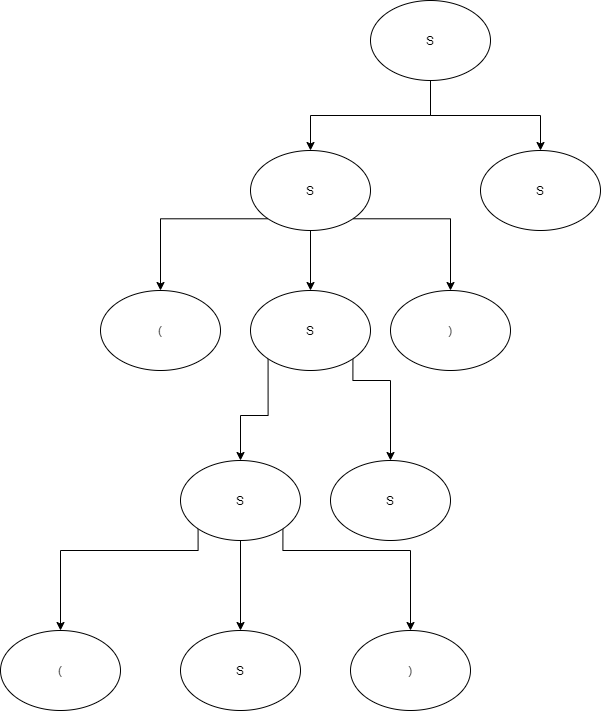

## Disambiguated Expression Parsing

Derivation sequence for ```2*3+2``` noted below

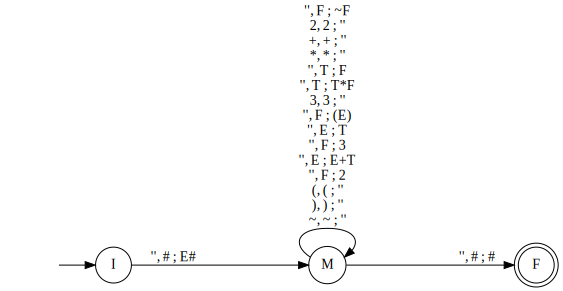

In [6]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA

!!-- The grammar E -> E+E | E*E | (E) | ~E | 2 | 3 is ambiguous!
!!-- Two parse trees!
!!-- This is your Asg Part 2b

!!-- STRATIFIED GRAMMAR for expressions avoids ambiguity - below!
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
!!-- Direct-converted PDA from above CFG
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)
dotObj_pda(pdaE, FuseEdges=True)

### TODO: Convert and compare Jove with the Automaton Simulator

As before. Include a link encoding your saved machine.
This one I'm less sure about. I followed the advice given in this youtube video: https://www.youtube.com/watch?v=ZImtQBMSW_Y and ended up with the following PDA: https://automatonsimulator.com/#%7B%22type%22%3A%22PDA%22%2C%22pda%22%3A%7B%22transitions%22%3A%7B%22start%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s0%22%2C%22stackPushChar%22%3A%22%23%22%7D%5D%7D%7D%2C%22s0%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%7D%7D%2C%22s1%22%3A%7B%222%22%3A%7B%222%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%223%22%3A%7B%223%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22%22%3A%7B%22%23%22%3A%5B%7B%22state%22%3A%22s2%22%2C%22stackPushChar%22%3A%22%22%7D%5D%2C%22E%22%3A%5B%7B%22state%22%3A%22s3%22%2C%22stackPushChar%22%3A%22T%22%7D%2C%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22T%22%7D%5D%2C%22T%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22F%22%7D%2C%7B%22state%22%3A%22s5%22%2C%22stackPushChar%22%3A%22F%22%7D%5D%7D%2C%22%2B%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%2C%22*%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22%22%7D%5D%7D%7D%2C%22s3%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s4%22%2C%22stackPushChar%22%3A%22%2B%22%7D%5D%7D%7D%2C%22s4%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22E%22%7D%5D%7D%7D%2C%22s5%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s6%22%2C%22stackPushChar%22%3A%22*%22%7D%5D%7D%7D%2C%22s6%22%3A%7B%22%22%3A%7B%22%22%3A%5B%7B%22state%22%3A%22s1%22%2C%22stackPushChar%22%3A%22T%22%7D%5D%7D%7D%7D%2C%22startState%22%3A%22start%22%2C%22acceptStates%22%3A%5B%5D%7D%2C%22states%22%3A%7B%22start%22%3A%7B%7D%2C%22s0%22%3A%7B%22top%22%3A330%2C%22left%22%3A209%2C%22displayId%22%3A%22s0%22%7D%2C%22s1%22%3A%7B%22top%22%3A311%2C%22left%22%3A397%2C%22displayId%22%3A%22W%22%7D%2C%22s2%22%3A%7B%22top%22%3A311%2C%22left%22%3A676%2C%22displayId%22%3A%22F%22%7D%2C%22s3%22%3A%7B%22top%22%3A483%2C%22left%22%3A261%2C%22displayId%22%3A%22s3%22%7D%2C%22s5%22%3A%7B%22top%22%3A447%2C%22left%22%3A602%2C%22displayId%22%3A%22s5%22%7D%2C%22s4%22%3A%7B%22top%22%3A606%2C%22left%22%3A320%2C%22displayId%22%3A%22s4%22%7D%2C%22s6%22%3A%7B%22top%22%3A526%2C%22left%22%3A551%2C%22displayId%22%3A%22s6%22%7D%7D%2C%22transitions%22%3A%5B%7B%22stateA%22%3A%22start%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%23%22%2C%22stateB%22%3A%22s0%22%7D%2C%7B%22stateA%22%3A%22s0%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CE%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%222%2C2%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%223%2C3%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2C%23%2C%CF%B5%22%2C%22stateB%22%3A%22s2%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CE%2CT%22%2C%22stateB%22%3A%22s3%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CE%2CT%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CT%2CF%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%CF%B5%2CT%2CF%22%2C%22stateB%22%3A%22s5%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22%2B%2C%CF%B5%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s1%22%2C%22label%22%3A%22*%2C%CF%B5%2C%CF%B5%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s3%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C%2B%22%2C%22stateB%22%3A%22s4%22%7D%2C%7B%22stateA%22%3A%22s4%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CE%22%2C%22stateB%22%3A%22s1%22%7D%2C%7B%22stateA%22%3A%22s5%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2C*%22%2C%22stateB%22%3A%22s6%22%7D%2C%7B%22stateA%22%3A%22s6%22%2C%22label%22%3A%22%CF%B5%2C%CF%B5%2CT%22%2C%22stateB%22%3A%22s1%22%7D%5D%2C%22bulkTests%22%3A%7B%22accept%22%3A%22%22%2C%22reject%22%3A%22%22%7D%7D

In [5]:
explore_pda('2*3+2', pdaE)

String 2*3+2 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '2*3+2', '#')
->  ('M', '2*3+2', 'E#')
->  ('M', '2*3+2', 'E+T#')
->  ('M', '2*3+2', 'T+T#')
->  ('M', '2*3+2', 'T*F+T#')
->  ('M', '2*3+2', 'F*F+T#')
->  ('M', '2*3+2', '2*F+T#')
->  ('M', '*3+2', '*F+T#')
->  ('M', '3+2', 'F+T#')
->  ('M', '3+2', '3+T#')
->  ('M', '+2', '+T#')
->  ('M', '2', 'T#')
->  ('M', '2', 'F#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') .


### ID Sequence to Derivation Sequence to Implied Parse-Tree

```
     ID SEQUENCE             -- FORMING EACH STEP of DERIVATION SEQUENCE
=================================================================================  
->  ('I', '2*3+2', '#')      -- 
->  ('M', '2*3+2', 'E#')     -- E        (pushed)
->  ('M', '2*3+2', 'E+T#')   -- => E+T   (removed E; pushed E+T)
->  ('M', '2*3+2', 'T+T#')   -- => T+T   (pushed T)
->  ('M', '2*3+2', 'T*F+T#') -- => T*F+T (removed T, pushed T*F)
->  ('M', '2*3+2', 'F*F+T#') -- => F*F+T (removed T, pushed F)
->  ('M', '2*3+2', '2*F+T#') -- => 2*F+T (removed F, pushed 2)
->  ('M', '*3+2', '*F+T#')   -- => leaf-match of 2, no new push, deriv seq same as before
->  ('M', '3+2', 'F+T#')     -- => leaf-match of *, no new push. NOTICE "*" DONE BEFORE +
->  ('M', '3+2', '3+T#')     -- => ...
->  ('M', '+2', '+T#')
->  ('M', '2', 'T#')
->  ('M', '2', 'F#')
->  ('M', '2', '2#')
->  ('M', '', '#')
->  ('F', '', '#') . 
```


### TODO: Finish --- Derivation sequence is


```E => E+T => T+T => T*F+T => F*F+T => 2*F+T => 2*3+T => 2*3+F => 2*3+2``` (You flesh out.)

### TODO Draw the Parse Tree from this DS.

Use a neat drawing tool, and put the source and the PNG here.
Source: diagrams.net https://drive.google.com/file/d/105EopTbn_kRKmaE15HL86FaQWOdEUQG6/view?usp=sharing
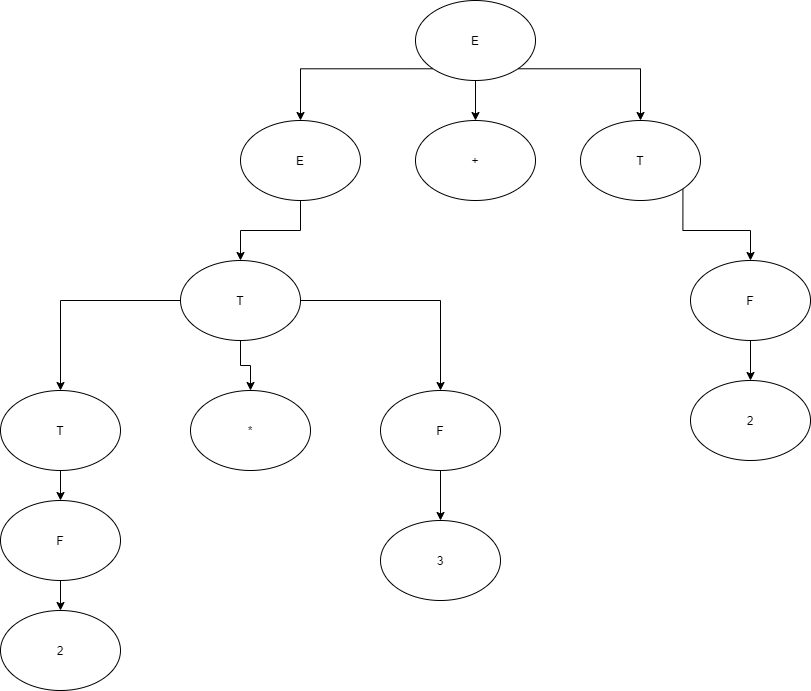

Note how * is done before +.

## TODO Study Context-Free Grammars Further



1. Learn how to "run" CFGs by directly converting them to PDA, and running those PDA.
2. Watch YouTube videos as presented "in context" below.

#### CFG Basics and How to Directly Parse Them Using PDA

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('bymg3MDe6Y4')

Direct path: https://youtu.be/bymg3MDe6Y4 (31 min mark).

From about the 30-minute mark, the video discusses the grammar:

S -> aSa | bSb | epsilon,

for $\{w w^R \;:\; w \in \{a, b\}^* \}$.

### The Next Video

(Direct path https://youtu.be/N5wQovKIZGM) discusses:
1. Consistency/Completeness
2. Linearity
3. Ambiguity

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('N5wQovKIZGM')

### TODO Run the "Direct Simulation of CFG from PDA"

for the above grammar. Notice how each grammar rule is encoded DIRECTLY as a PDA transition.

These PDA always have the *SAME* I to W and W to F moves ...

Only the W to W moves vary; and here, they have transitions that go by the CFG.

There are always $a \in \Sigma$ transitions that drain every $a \in \Sigma$, matching it with an incoming $a$.

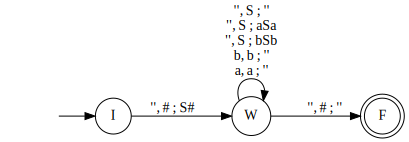

In [7]:
wwR = md2mc('''
PDA
!!-- The CFG to be simulated
!!-- S -> aSa | bSb | ''

!!-- This move is the same for any CFG
I : '',#; S# -> W

!!-- These moves imitate the CFG productions directly
W : '',S; aSa -> W
W : '',S; bSb -> W
W : '',S; ''  -> W

!!-- Transitions for every member of Sigma
W : a,a; '' -> W
W : b,b; '' -> W

!!-- This transition is also there for every CFG
W : '',#; ''   -> F
''')
dotObj_pda(wwR, FuseEdges=True)

In [8]:
explore_pda('aabaabaa', wwR)

String aabaabaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', 'aabaabaa', '#')
->  ('W', 'aabaabaa', 'S#')
->  ('W', 'aabaabaa', 'aSa#')
->  ('W', 'abaabaa', 'Sa#')
->  ('W', 'abaabaa', 'aSaa#')
->  ('W', 'baabaa', 'Saa#')
->  ('W', 'baabaa', 'bSbaa#')
->  ('W', 'aabaa', 'Sbaa#')
->  ('W', 'aabaa', 'aSabaa#')
->  ('W', 'abaa', 'Sabaa#')
->  ('W', 'abaa', 'abaa#')
->  ('W', 'baa', 'baa#')
->  ('W', 'aa', 'aa#')
->  ('W', 'a', 'a#')
->  ('W', '', '#')
->  ('F', '', '') .


### Animate with Jove and Alternative

In [9]:
from jove.AnimatePDA import *
AnimatePDA(wwR, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))


 "help(AnimatePDA)" gives you info on how to use animations with PDA 


Do this and all the rest with the alternative Automaton Simulator also. https://automatonsimulator.com

### Animation Panel for all Machines (choose PDA)

### You may do the above animation here.
#### Access the PDA panel and key-in the definition of wwR in there.

In [10]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))


 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


The explore_pda call below fails because the string is not of the form $ww^R$. Here you must use ```explore_pda```, not animation, to further investigate.

In [11]:
explore_pda('aabaaaba', wwR)

String aabaaaba rejected by your PDA :-(
Visited states are:
{('W', 'abaaaba', 'Sa#'), ('W', 'aabaaaba', 'S#'), ('F', 'baaaba', ''), ('W', 'abaaaba', 'bSba#'), ('W', 'aaba', 'bSbabaa#'), ('W', 'aabaaaba', '#'), ('W', 'a', 'aSabaaabaa#'), ('W', 'aaba', 'Sabaa#'), ('W', 'aaaba', 'baa#'), ('W', 'aba', 'Saabaa#'), ('W', 'baaaba', 'bSbaa#'), ('W', 'ba', 'Saaabaa#'), ('W', 'aba', 'bSbaabaa#'), ('W', 'baaaba', 'aSaaa#'), ('W', '', 'Sabaaabaa#'), ('W', 'aaaba', 'aSabaa#'), ('W', 'abaaaba', 'aSaa#'), ('W', 'aabaaaba', 'aSa#'), ('W', 'aba', 'aabaa#'), ('W', 'baaaba', 'Saa#'), ('W', 'aabaaaba', 'bSb#'), ('W', 'aba', 'baa#'), ('W', 'ba', 'abaa#'), ('W', 'ba', 'aSaaaabaa#'), ('W', 'aaba', 'abaa#'), ('W', 'ba', 'bSbaaabaa#'), ('W', 'ba', 'aaabaa#'), ('W', 'aaaba', 'Sbaa#'), ('W', 'aaba', 'aSaabaa#'), ('W', 'aba', 'aSaaabaa#'), ('W', '', 'bSbabaaabaa#'), ('F', 'aabaaaba', ''), ('W', '', 'abaaabaa#'), ('W', 'a', 'Sbaaabaa#'), ('W', 'baaaba', '#'), ('W', '', 'aSaabaaabaa#'), ('W', 'abaaaba', 'a#'), ('W

### An RE Grammar and its PDA Encoding

Observe the number of possible parses.

This is a highly ambiguous grammar because there are many parses for the same input.

In [12]:
repda = md2mc('''PDA
!!R -> R R | R + R | R* | ( R ) | 0 | 1 | e
I : '', #  ; R#  -> M
M : '', R  ; RR  -> M
M : '', R  ; R+R -> M
M : '', R  ; R*  -> M
M : '', R  ; (R) -> M
M : '', R  ; 0   -> M
M : '', R  ; 1   -> M
M : '', R  ; e   -> M
M : 0,  0  ; ''  -> M
M : 1,  1  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : e,  e  ; ''  -> M
M : '', #  ; #   -> F
'''
)

In [13]:
repda

{'Delta': {('I', '', '#'): {('M', 'R#')},
  ('M', '', '#'): {('F', '#')},
  ('M', '', 'R'): {('M', '(R)'),
   ('M', '0'),
   ('M', '1'),
   ('M', 'R*'),
   ('M', 'R+R'),
   ('M', 'RR'),
   ('M', 'e')},
  ('M', '(', '('): {('M', '')},
  ('M', ')', ')'): {('M', '')},
  ('M', '+', '+'): {('M', '')},
  ('M', '0', '0'): {('M', '')},
  ('M', '1', '1'): {('M', '')},
  ('M', 'e', 'e'): {('M', '')}},
 'F': {'F'},
 'Gamma': {'#', '(', ')', '*', '+', '0', '1', 'R', 'e'},
 'Q': {'F', 'I', 'M'},
 'Sigma': {'(', ')', '+', '0', '1', 'e'},
 'q0': 'I',
 'z0': '#'}

In [14]:
DO_repda = dotObj_pda(repda, FuseEdges=True)

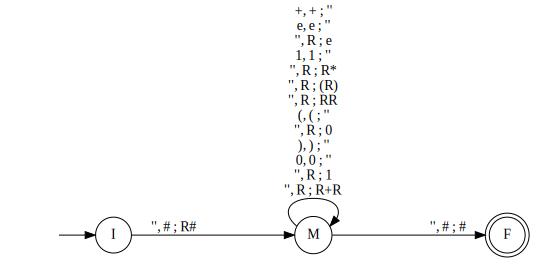

In [15]:
DO_repda

In [16]:
explore_pda("0", repda, STKMAX=4)

String 0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0', '#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [17]:
explore_pda("00", repda)

String 00 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00', '#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [18]:
explore_pda("(0)", repda)

String (0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)', '#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [19]:
explore_pda("(00)", repda)

String (00) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(00)', '#')
->  ('M', '(00)', 'R#')
->  ('M', '(00)', '(R)#')
->  ('M', '00)', 'R)#')
->  ('M', '00)', 'RR)#')
->  ('M', '00)', '0R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [20]:
explore_pda("(0)(0)", repda)

String (0)(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)(0)', '#')
->  ('M', '(0)(0)', 'R#')
->  ('M', '(0)(0)', 'RR#')
->  ('M', '(0)(0)', '(R)R#')
->  ('M', '0)(0)', 'R)R#')
->  ('M', '0)(0)', '0)R#')
->  ('M', ')(0)', ')R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [21]:
explore_pda("0+0", repda, STKMAX=3)

String 0+0 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '0+0', '#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [22]:
explore_pda("(0)+(0)", repda)

String (0)+(0) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '(0)+(0)', '#')
->  ('M', '(0)+(0)', 'R#')
->  ('M', '(0)+(0)', 'R+R#')
->  ('M', '(0)+(0)', '(R)+R#')
->  ('M', '0)+(0)', 'R)+R#')
->  ('M', '0)+(0)', '0)+R#')
->  ('M', ')+(0)', ')+R#')
->  ('M', '+(0)', '+R#')
->  ('M', '(0)', 'R#')
->  ('M', '(0)', '(R)#')
->  ('M', '0)', 'R)#')
->  ('M', '0)', '0)#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [23]:
explore_pda("00+0", repda)

String 00+0 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'R+R#')
->  ('M', '00+0', 'RR+R#')
->  ('M', '00+0', '0R+R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+0', '#')
->  ('M', '00+0', 'R#')
->  ('M', '00+0', 'RR#')
->  ('M', '00+0', '0R#')
->  ('M', '0+0', 'R#')
->  ('M', '0+0', 'R+R#')
->  ('M', '0+0', '0+R#')
->  ('M', '+0', '+R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [24]:
explore_pda("000", repda, STKMAX=3)

String 000 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', '0R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '000', '#')
->  ('M', '000', 'R#')
->  ('M', '000', 'RR#')
->  ('M', '000', 'RRR#')
->  ('M', '000', '0RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [25]:
explore_pda("00+00", repda, STKMAX=4)

String 00+00 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', '0R#')
->  ('M', '0+00', 'R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [26]:
explore_pda("00+00", repda, STKMAX=5)

String 00+00 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'R+R#')
->  ('M', '00+00', 'RR+R#')
->  ('M', '00+00', '0R+R#')
->  ('M', '0+00', 'R+R#')
->  ('M', '0+00', '0+R#')
->  ('M', '+00', '+R#')
->  ('M', '00', 'R#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '00+00', 'RR#')
->  ('M', '00+00', 'R+RR#')
->  ('M', '00+00', 'RR+RR#')
->  ('M', '00+00', '0R+RR#')
->  ('M', '0+00', 'R+RR#')
->  ('M', '0+00', '0+RR#')
->  ('M', '+00', '+RR#')
->  ('M', '00', 'RR#')
->  ('M', '00', '0R#')
->  ('M', '0', 'R#')
->  ('M', '0', '0#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '00+00', '#')
->  ('M', '00+00', 'R#')
->  ('M', '0

### PDA for Well-Balanced Parentheses

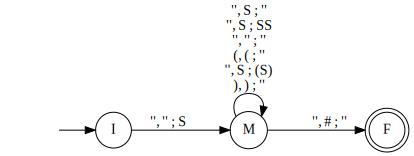

In [27]:
brpda1 = md2mc('''PDA

!!-- The CFG simulated is
!!-- S -> (S)|SS|''

!!-- Initial move to state M (was W above)
 I : '', '' ; S     -> M
 
 M : '', S  ; (S) -> M
 M : '', S  ; SS   -> M
 M : '', S  ; ''    -> M
 
 M : (,  (  ; ''    -> M
 M : ),  )  ; ''    -> M
 
 M : '',  ''  ; ''  -> M
 
 M : '', #  ; ''    -> F''')

dotObj_pda(brpda1, FuseEdges=True)

In [28]:
explore_pda("()(())", brpda1, STKMAX=5)

String ()(()) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '')
Reached as follows:
->  ('I', '()(())', '#')
->  ('M', '()(())', 'S#')
->  ('M', '()(())', 'SS#')
->  ('M', '()(())', '(S)S#')
->  ('M', ')(())', 'S)S#')
->  ('M', ')(())', ')S#')
->  ('M', '(())', 'S#')
->  ('M', '(())', '(S)#')
->  ('M', '())', 'S)#')
->  ('M', '())', '(S))#')
->  ('M', '))', 'S))#')
->  ('M', '))', '))#')
->  ('M', ')', ')#')
->  ('M', '', '#')
->  ('F', '', '') .


### Ambiguous Parsing of Arithmetic Expressions

In [29]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

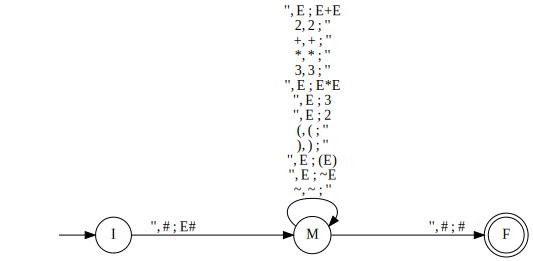

In [30]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [31]:
explore_pda("3+2*3", pdaEamb, STKMAX=5)

String 3+2*3 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [32]:
explore_pda("3+2*3+2*3", pdaEamb, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 13 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E*E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E*E#')
->  ('M', '3+2*3+2*3', '3+E*E*E#')
->  ('M', '+2*3+2*3', '+E*E*E#')
->  ('M', '2*3+2*3', 'E*E*E#')
->  ('M', '2*3+2*3', '2*E*E#')
->  ('M', '*3+2*3', '*E*E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E*E#')
->  ('M', '3+2*3+2*3', 'E+E*E#')
->  ('M', '3+2*3+2*3', '3+E*E#')
->  ('M', '+2*3+2*3', '+E*E#')
->  ('M', '2*3+2*3', 'E*E#')
->  ('M', '2*3+2*3', 'E*E*E#')
-> 

### Disambiguated Arithmetic Expression Grammar

In [33]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

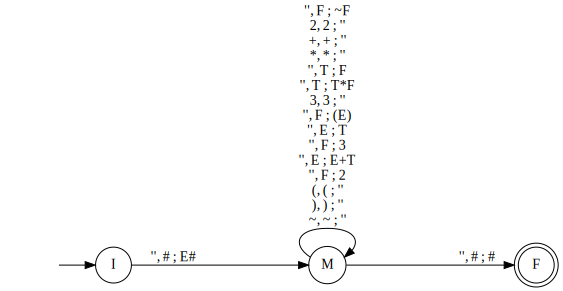

In [34]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [35]:
explore_pda("3+2*3", pdaE, STKMAX=7)

String 3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+T#')
->  ('M', '3+2*3', 'T+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [36]:
explore_pda("3+2*3+2*3", pdaE, STKMAX=7)

String 3+2*3+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3+2*3', '#')
->  ('M', '3+2*3+2*3', 'E#')
->  ('M', '3+2*3+2*3', 'E+T#')
->  ('M', '3+2*3+2*3', 'E+T+T#')
->  ('M', '3+2*3+2*3', 'T+T+T#')
->  ('M', '3+2*3+2*3', 'F+T+T#')
->  ('M', '3+2*3+2*3', '3+T+T#')
->  ('M', '+2*3+2*3', '+T+T#')
->  ('M', '2*3+2*3', 'T+T#')
->  ('M', '2*3+2*3', 'T*F+T#')
->  ('M', '2*3+2*3', 'F*F+T#')
->  ('M', '2*3+2*3', '2*F+T#')
->  ('M', '*3+2*3', '*F+T#')
->  ('M', '3+2*3', 'F+T#')
->  ('M', '3+2*3', '3+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [37]:
explore_pda("3*2*~3+~~3*~3", pdaE, STKMAX=10)

String 3*2*~3+~~3*~3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E+T#')
->  ('M', '3*2*~3+~~3*~3', 'T+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'T*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', 'F*F*F+T#')
->  ('M', '3*2*~3+~~3*~3', '3*F*F+T#')
->  ('M', '*2*~3+~~3*~3', '*F*F+T#')
->  ('M', '2*~3+~~3*~3', 'F*F+T#')
->  ('M', '2*~3+~~3*~3', '2*F+T#')
->  ('M', '*~3+~~3*~3', '*F+T#')
->  ('M', '~3+~~3*~3', 'F+T#')
->  ('M', '~3+~~3*~3', '~F+T#')
->  ('M', '3+~~3*~3', 'F+T#')
->  ('M', '3+~~3*~3', '3+T#')
->  ('M', '+~~3*~3', '+T#')
->  ('M', '~~3*~3', 'T#')
->  ('M', '~~3*~3', 'T*F#')
->  ('M', '~~3*~3', 'F*F#')
->  ('M', '~~3*~3', '~F*F#')
->  ('M', '~3*~3', 'F*F#')
->  ('M', '~3*~3', '~F*F#')
->  ('M', '3*~3', 'F*F#')
->  ('M', '3*~3', '3*F#')
->  ('M', '*~3', '*F#')
->  ('M', '~3', 'F#')
->  ('M', '~3', '~F#')
->  ('M'

In [38]:
explore_pda("3*2*~3+~~3*~3", pdaEamb, STKMAX=8)

String 3*2*~3+~~3*~3 accepted by your PDA in 36 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3*2*~3+~~3*~3', '#')
->  ('M', '3*2*~3+~~3*~3', 'E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E#')
->  ('M', '3*2*~3+~~3*~3', 'E*E*E*E#')
->  ('M', '3*2*~3+~~3*~3', '3*E*E*E#')
->  ('M', '*2*~3+~~3*~3', '*E*E*E#')
->  ('M', '2*~3+~~3*~3', 'E*E*E#')
->  ('M', '2*~3+~~3*~3', '2*E*E#')
->  ('M', '*~3+~~3*~3', '*E*E#')
->  ('M', '~3+~~3*~3', 'E*E#')
->  ('M', '~3+~~3*~3', 'E+E*E#')
->  ('M', '~3+~~3*~3', '~E+E*E#')
->  ('M', '3+~~3*~3', 'E+E*E#')
->  ('M', '3+~~3*~3', '3+E*E#')
->  ('M', '+~~3*~3', '+E*E#')
->  ('M', '~~3*~3', 'E*E#')
->  ('M', '~~3*~3', '~E*E#')
->  ('M', '~3*~3', 'E*E#')
->  ('M', '~3*~3', '~E*E#')
->  ('M', '3*~3', 'E*E#')
->  ('M', '3*~3', '3*E#')
->  ('M', '*~3', '*E#')
->  ('M', '~3', 'E#')
->  ('M', '~3', '~E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state 